# DSCI 100 Final Report - Group28

## 1. Introduction
The video game industry began in the 1950s as simple games and simulations. Pixelated screens and limited sound have become a distant memory as video games are offering photorealistic graphics and pushing the frontier of stimulational reality. Video games is one of the largest sectors in the entertainment industry. With the fast growing market, the gaming industry requires marketing data to help predict the sales for their new games. However, in recent years, the emergence of social networks and the developments of mobile games have greatly impacted traditional video games. Careful marketing planning is crucial when a new game is introduced to the market. Therefore, our research question is to predict the sales in the European market for a new action or sports video game given North America and other regional sales. To achieve this, we used a dataset generated by scraping of vgchartz.com. It contains a list of video games with sales greater than 100,000 copies from 1980 to 2017.

**Dataset:**
* Our dataset can be found at <a href="https://github.com/GregorUT/vgchartzScrape.git" target="_blank">this link</a>.
* Dataset is scraped from <a href="https://www.vgchartz.com" target="_blank">Vgchartz website</a>.
* <a href="https://www.kaggle.com/gregorut/videogamesales" target="_blank">Reference</a> can be found here.


In [40]:
# * `Name`: name of the game
# * `Platform`: platform of the game release
# * `Year`: year that the game is released
# * `Genre`: genre of the game
# * `Publisher`: publisher of the game
# * `NA_Sales`: sales in North America (in millions)
# * `EU_Sales`: sales in Europe (in millions)
# * `JP_Sales`: sales in Japan (in millions)
# * `Other_sales`: sales in other countries (in millions)
# * `Global_sales`: total worldwide sales

In [41]:
#library needed for this project
library(tidyverse)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(tidymodels)
library(repr)
library(cowplot)
options(repr.matrix.max.rows = 6)

### 1.1 Load data onto Jyputer notebook

In [42]:
raw_vgdata <- read_csv("https://raw.githubusercontent.com/kristennli/DSCI100_project/main/vgsales.csv")

Parsed with column specification:
cols(
  Rank = col_double(),
  Name = col_character(),
  Platform = col_character(),
  Year = col_character(),
  Genre = col_character(),
  Publisher = col_character(),
  NA_Sales = col_double(),
  EU_Sales = col_double(),
  JP_Sales = col_double(),
  Other_Sales = col_double(),
  Global_Sales = col_double()
)



### 1.2 Summary of data

In [43]:
summary(raw_vgdata)
#use glimpse to preview the dataset
glimpse(raw_vgdata)

      Rank           Name             Platform             Year          
 Min.   :    1   Length:16598       Length:16598       Length:16598      
 1st Qu.: 4151   Class :character   Class :character   Class :character  
 Median : 8300   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8301                                                           
 3rd Qu.:12450                                                           
 Max.   :16600                                                           
    Genre            Publisher            NA_Sales          EU_Sales      
 Length:16598       Length:16598       Min.   : 0.0000   Min.   : 0.0000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Mode  :character   Mode  :character   Median : 0.0800   Median : 0.0200  
                                       Mean   : 0.2647   Mean   : 0.1467  
                                       3rd Qu.: 0.2400   3rd Qu.: 0.1100  
                                

Rows: 16,598
Columns: 11
$ Rank         <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ Name         <chr> "Wii Sports", "Super Mario Bros.", "Mario Kart Wii", "Wi…
$ Platform     <chr> "Wii", "NES", "Wii", "Wii", "GB", "GB", "DS", "Wii", "Wi…
$ Year         <chr> "2006", "1985", "2008", "2009", "1996", "1989", "2006", …
$ Genre        <chr> "Sports", "Platform", "Racing", "Sports", "Role-Playing"…
$ Publisher    <chr> "Nintendo", "Nintendo", "Nintendo", "Nintendo", "Nintend…
$ NA_Sales     <dbl> 41.49, 29.08, 15.85, 15.75, 11.27, 23.20, 11.38, 14.03, …
$ EU_Sales     <dbl> 29.02, 3.58, 12.88, 11.01, 8.89, 2.26, 9.23, 9.20, 7.06,…
$ JP_Sales     <dbl> 3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.50, 2.93, 4.70, 0…
$ Other_Sales  <dbl> 8.46, 0.77, 3.31, 2.96, 1.00, 0.58, 2.90, 2.85, 2.26, 0.…
$ Global_Sales <dbl> 82.74, 40.24, 35.82, 33.00, 31.37, 30.26, 30.01, 29.02, …


### 1.3 Removal of Missing Data

Dataset is in tidy format, therefore, no additional cleaning and wrangling are necessary. However, missing data is removed by using `omit.na` function assuming they are missing at random. Moreover, we focused on games published prior to 2017 since there are incomplete data from year 2017.

In [59]:
vg <- na.omit(raw_vgdata) %>%
      filter(Year<2017) 

head(vg)

#dataframe filtered on action games only
vga <- na.omit(raw_vgdata) %>%
      filter(Year<2017) %>%
        filter(Genre == "Action")

head(vga)

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98


### 1.4 Split Training and Testing Tests
We use the initial_split function to create the training and testing sets by specifying that prop = 0.75 so that 75% of the original data set ends up in the training set. We set the strata argument to the numerical variable (EU_Sales). These ensure that the the training model will have sufficient and appropriate amount of observations to optimize the model.

In [45]:
set.seed(9999) 
vg_split <- initial_split(vga, prop = 0.75, strata = EU_Sales)  
vg_train <- training(vg_split)   
vg_test <- testing(vg_split)

## 2. Methods & Results

### 2.1 Exploratory Data Visualization

We first want to find out how genre of game impact the past global sales. We can use group_by and summarize to find the amount of games under each genre and we see that action game is the most frequently sold gaming genre globally. 

`summarise()` ungrouping output (override with `.groups` argument)



Genre,n
<chr>,<int>
Action,3252
Sports,2304
Misc,1710
⋮,⋮
Fighting,836
Strategy,671
Puzzle,571


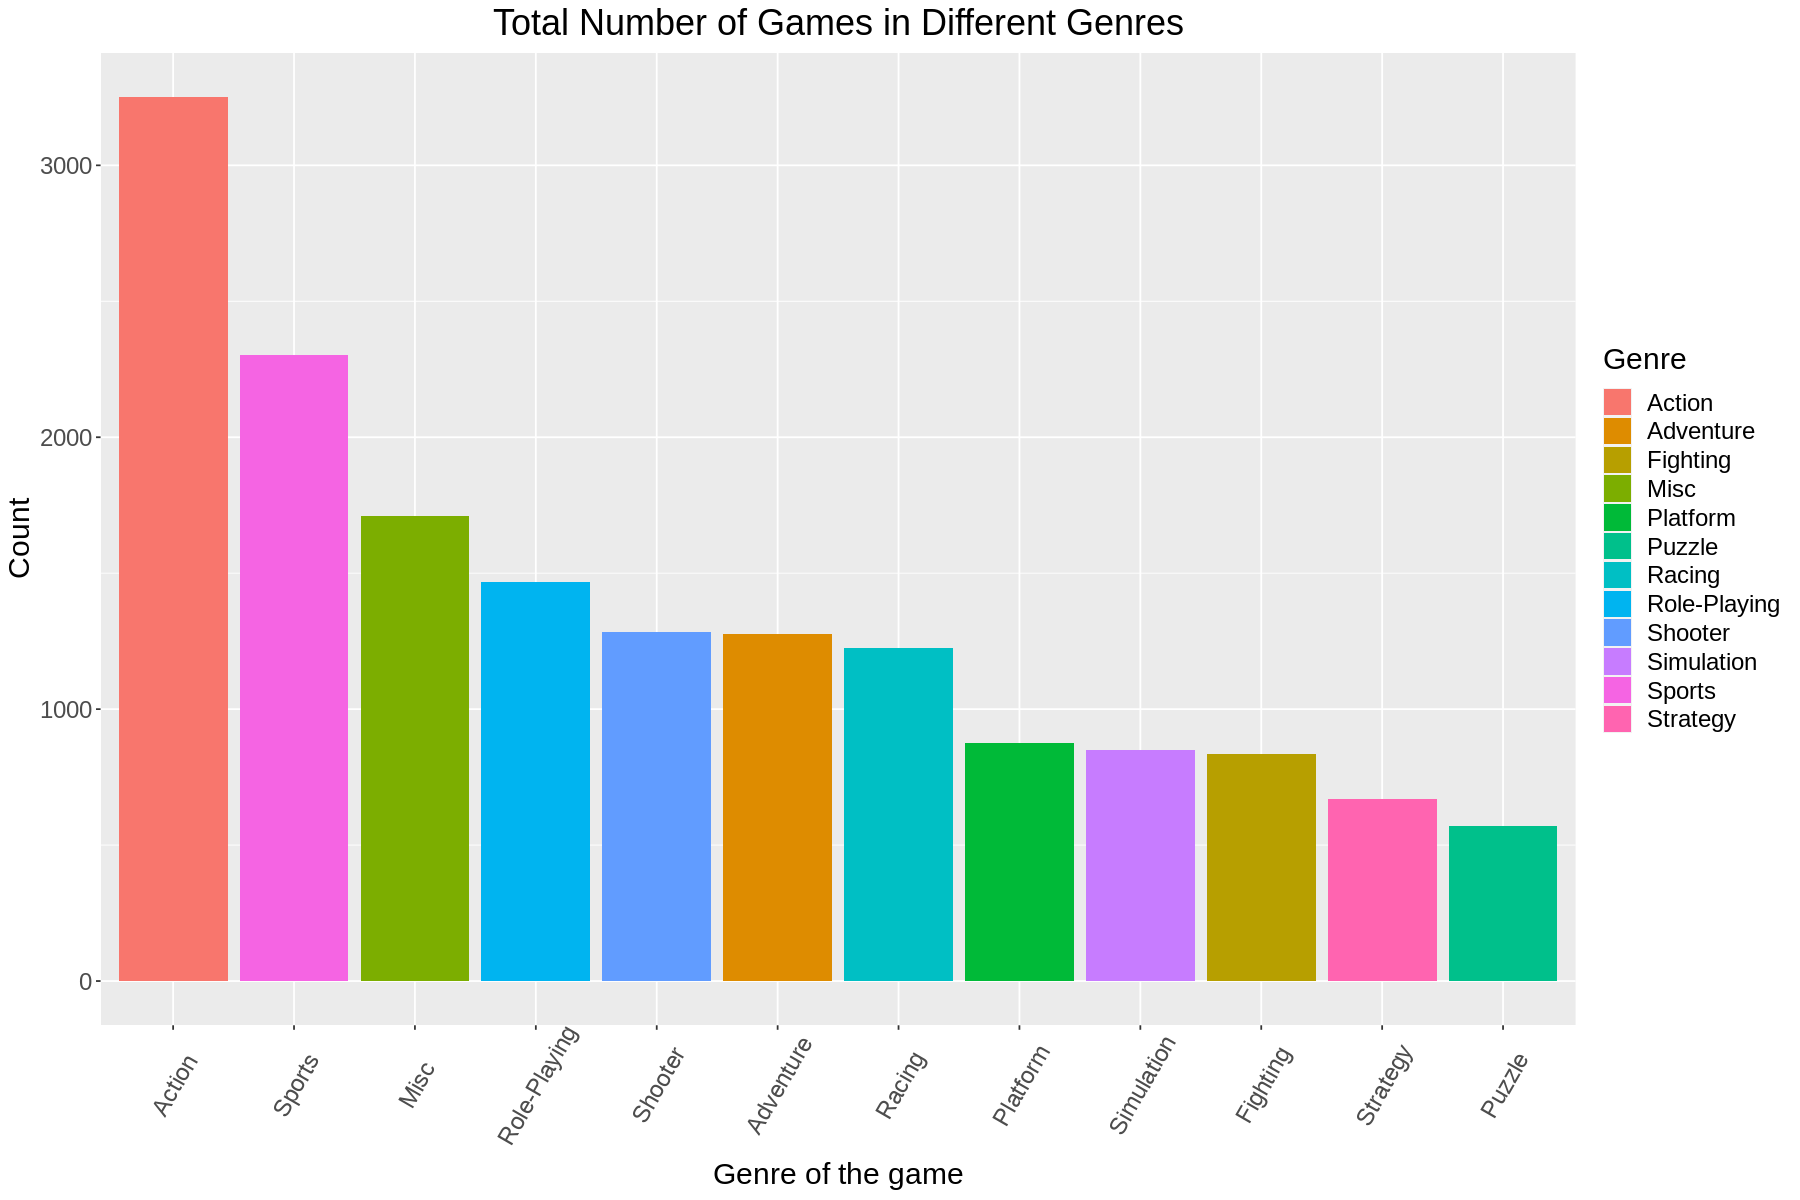

In [46]:
vg_genre <- vg %>%
  group_by(Genre) %>%
  summarise(n=n())%>%
  arrange(desc(n))

vg_genre

#Figure 1
#visualization on the number of games in each genre
options(repr.plot.width = 15, repr.plot.height = 10)
vg_genre_plot <- vg_genre%>%
  ggplot(aes(x = reorder(Genre, -n), y = n, fill = Genre))+
  geom_bar(stat = 'identity')+
  labs(x = "Genre of the game",
       y = "Count", 
       fill = "Genre",
       title = "Total Number of Games in Different Genres")+
  scale_color_brewer(palette = "Set3")+
  theme(axis.text.x = element_text(angle = 60, vjust = 0.6, hjust=0.5), 
        text = element_text(size = 18))+
  theme(plot.title = element_text(hjust = 0.5))

vg_genre_plot

<span style="color:gray">Figure 1. Total number of games sold for the top 7 genres</span>

We then look at how customers' preference in selecting games change over the years and we plot the total amount of sales of top 7 gaming genres. Based on *Figure 1* and *Figure 2*, we observed that the top 3 popular gaming genres are action, sports and shooter within the last 10 years. 

`summarise()` regrouping output by 'Year' (override with `.groups` argument)



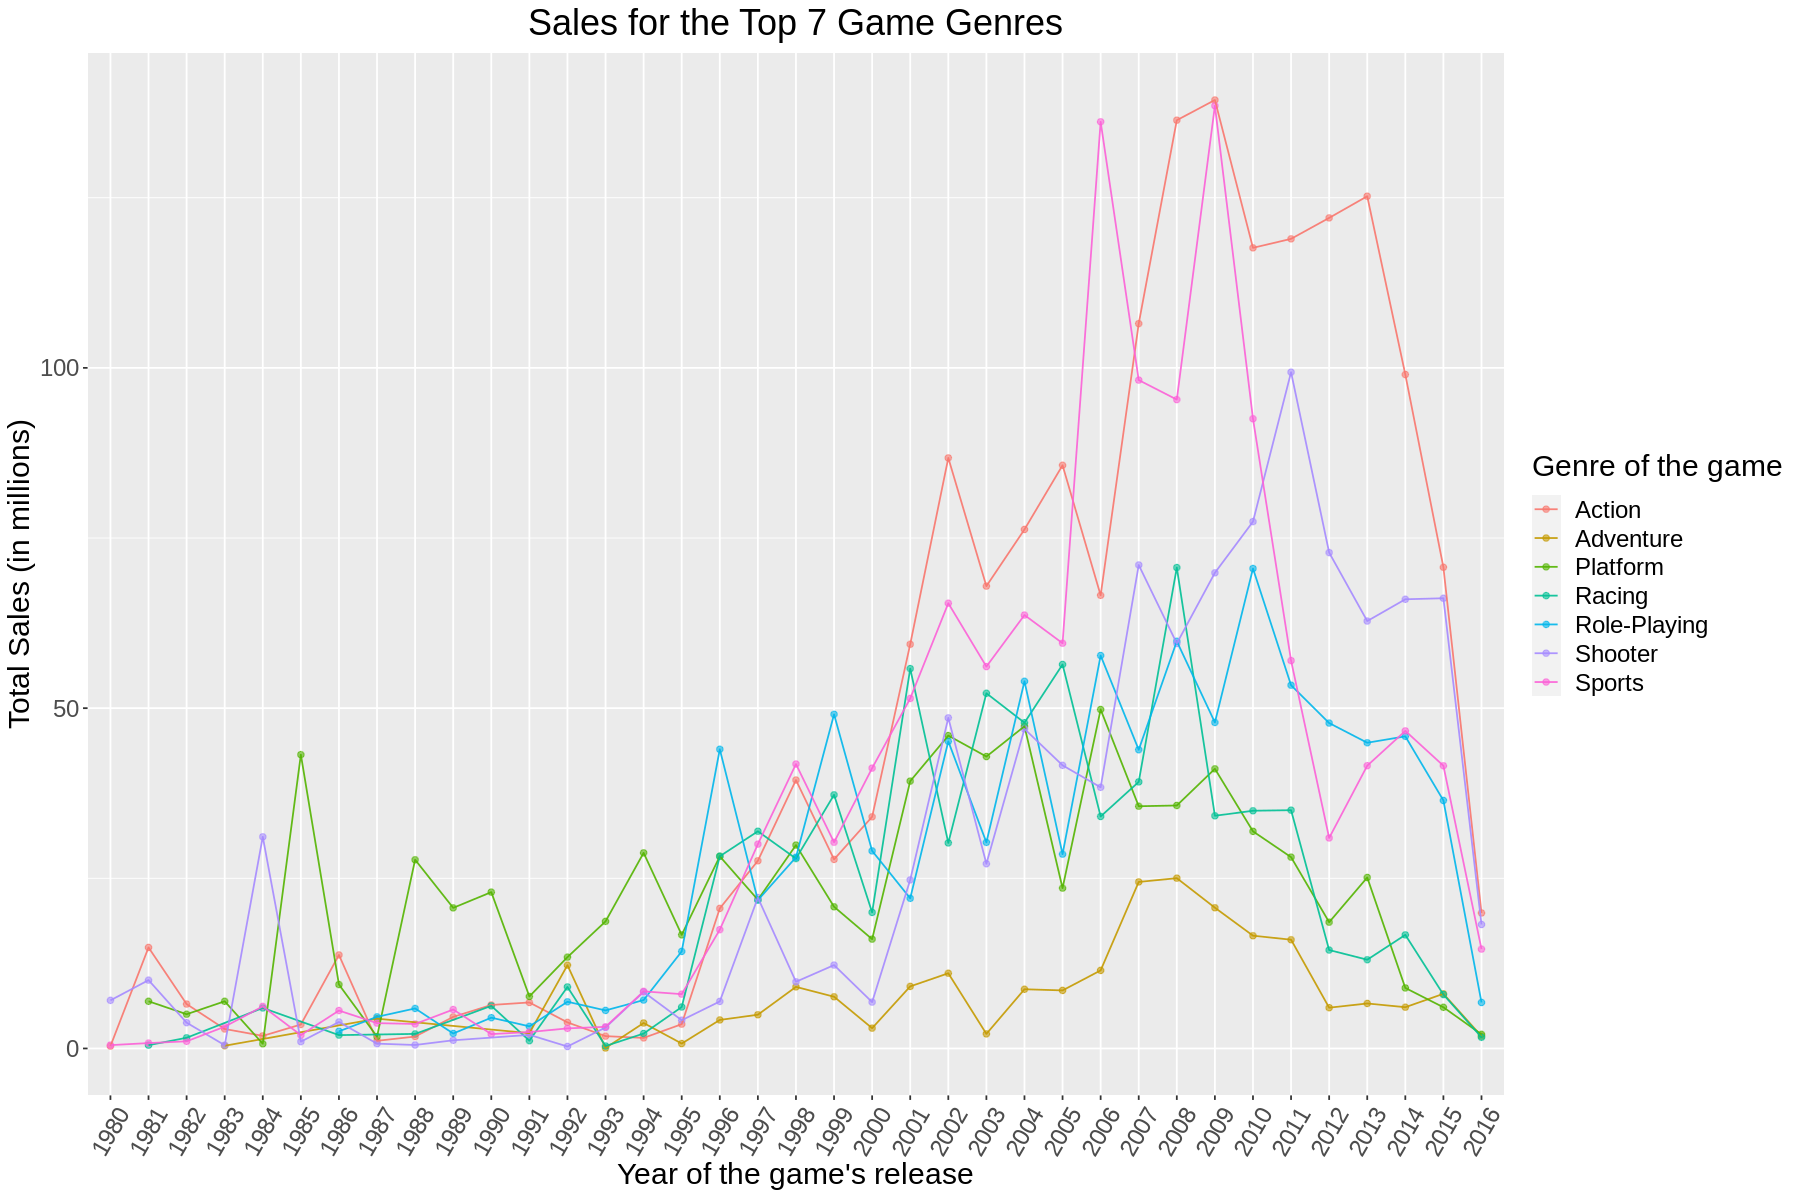

In [47]:
#summarize the different game genres' global sales
genre_gbsales <- vg %>%
  filter(Genre %in% c("Action","Sports","Role-Playing","Shooter",
                      "Adventure","Racing", "Platform"))%>%
    group_by(Year,Genre)%>%
    summarize(total_sales = sum(Global_Sales))

#Figure 2
#plot top 7 genres' global sales vs year of the game release
#only 7 out of 12 genres were selected for better visualization
options(repr.plot.width = 15, repr.plot.height = 10)
genre_gbsales_plot <- genre_gbsales %>%
  ggplot(aes(x = Year, y = total_sales, colour = Genre, group = Genre))+
  geom_point(alpha = 0.6)+
  geom_line(alpha = 0.9)+
    labs(x = "Year of the game's release",
         y = "Total Sales (in millions)", 
         colour = "Genre of the game",
         title = "Sales for the Top 7 Game Genres")+
    theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=0.5), 
          text = element_text(size = 18))+
    theme(plot.title = element_text(hjust = 0.5))

genre_gbsales_plot

<span style="color:gray">Figure 2. Global sales for the top 7 genres</span>

Based on the popularity shown in Figure 2, we decide to focus only on action games for further analysis. Factors like game genre can greatly affect the sales as observed from Figure 2. For instance, the total sales for action games are 5 times more than that of the platform games. We then use nrow() function to ensure that there are enough observations remained in our narrowed dataframe and there are a total of 3252 observations which provide a sufficient size of dataset for further analysis.

In [48]:
# count the number of games in each genre in the dataset
vg_genre_nrow <- vg %>%
    filter(Genre %in% c("Action")) %>%
    nrow()

vg_genre_nrow

[1] 3252

### 2.2 Correlation Matrix 

We then use `as.matrix()` to explore the correlation among each numerical variables in the training dataframe. According to *Table 1*, `EU_Sales` has higher correlation values for `NA_Sales` and `Other_Sales`, 0.79 and 0.52 respectively. The correlation value between `Global_Sales` and `Eu_Sales` is 0.89. However, we know that `Global_Sales` is the sum of the 4 different regional sales, which will be influenced greatly with each component, thus, we chose to omit the `Global_Sales` for further anlaysis.

<br> We will only consider `NA_Sales` and `Other_Sales` as potential predictors for `EU_Sales`. We know that increasing number of predictors does not necessarily improve the accuracy of our model. We will explore 2 cases; choosing `NA_Sales` as the only predictor or combining `NA_Sales` and `Other_Sales`. 

<br> Our research quesition is to build a regression model to predict European sales for action games. We are dealing with only numerical variables, we can do a comparative study on two different regression models - K-nearest Neighbour (KNN) and linear regression. We will then evaluate our model performance using root mean squared error (RMSE).

In [49]:
#correlation analysis, rounding the Matrics values to 2 decimal places
vg_cor<- vg_train %>% 
  select(-(Rank:Publisher))

sales_cor <- round(cor(vg_cor),2)%>%
  as.matrix()

sales_cor 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.00,0.79,0.31,0.66,0.95
EU_Sales,0.79,1.00,0.28,0.52,0.89
JP_Sales,0.31,0.28,1.00,0.18,0.43
Other_Sales,0.66,0.52,0.18,1.00,0.75
Global_Sales,0.95,0.89,0.43,0.75,1.00


<span style="color:gray">Table 1. Correlation Matrix for action game only dateset.

### 2.3 Linear Regression

#### 2.3.1 Case 1: One Predictor - NA_Sales

According to *Figure 2*, the best selling game genre is action. A way to demonstrate the marketing value of our regression model is to assume the partnering company will choose the best selling game genre for their next product. Therefore, we will only focus on action games within this video game dataset. 

!!!Junqi :  explain what we did each step in the regression model in English, please see comments to guide you through the writing.

In [50]:
#create model specification and recipe
lm_spec <- linear_reg() %>%
  set_engine("lm") %>%
  set_mode("regression")

#CASE1->one predictor: NA_Sales
lm_recipe <- recipe(EU_Sales ~ NA_Sales, data = vg_train)

#fit simple linear regression model
lm_fit <- workflow() %>%
  add_recipe(lm_recipe) %>%
  add_model(lm_spec) %>%
  fit(data = vg_train)
lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)     NA_Sales  
    0.01092      0.55975  


`geom_smooth()` using formula 'y ~ x'



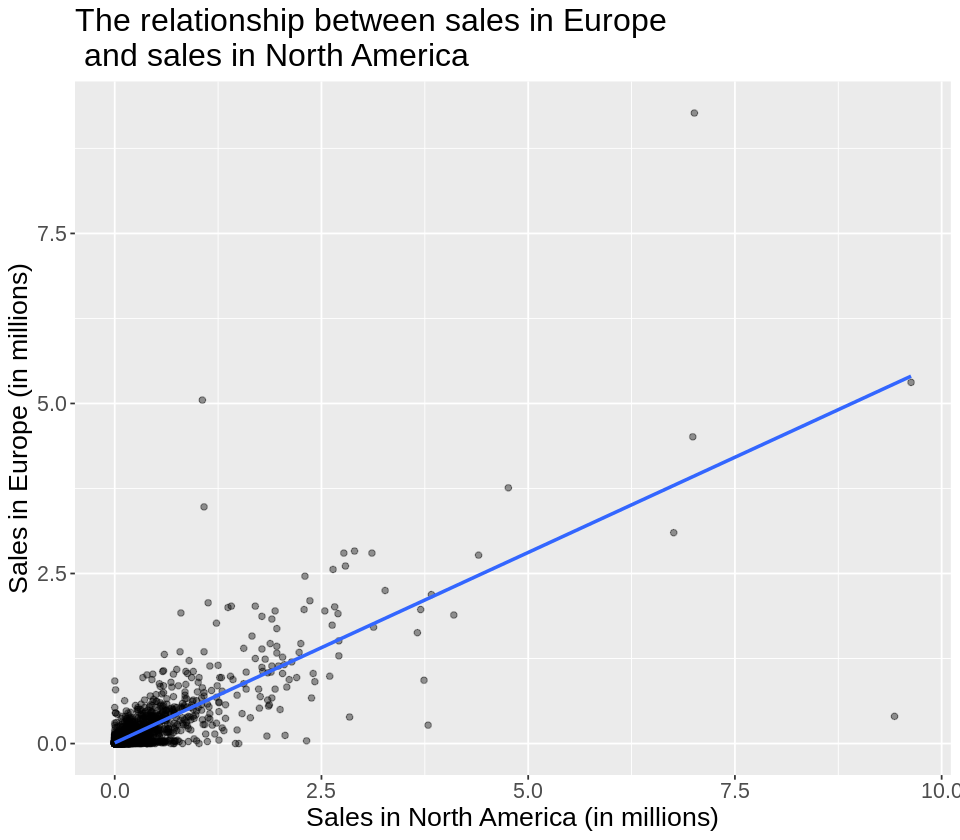

In [51]:
#simple linear regression model visualization
options(repr.plot.width = 8, repr.plot.height = 7)

lm_predictions <- vg_train%>%
    ggplot(aes(x = NA_Sales, y = EU_Sales))+
    geom_point(alpha=0.4)+
    labs(x = "Sales in North America (in millions)",
        y= "Sales in Europe (in millions)")+
    ggtitle("The relationship between sales in Europe \n and sales in North America")+
    theme(text = element_text(size = 16))+
    geom_smooth(method = "lm", se = FALSE) 
# +
#     xlim(c(0, 5))+
#     ylim(c(0, 5))
lm_predictions

<span style="color:gray">Figure 3. The relationship between sales in Europe and sales in North America</span>

From the above plot (*Figure 3*), we can see that there are only a few observations which are above 2.5 in both of the EU_Sales and NA_Sales. Therefore, we have more confidence to predict sales under 2.5 millions because there are more video game observations in this dataset. We can trust more from our predictions if we narrow our regression model to action games with sales that are less than 2.5 millions. Consequently, we plot the relationship between sales in Europe and North America with sales that are less than 2.5 millions in *Figure 4*.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 30 rows containing missing values (geom_point).”


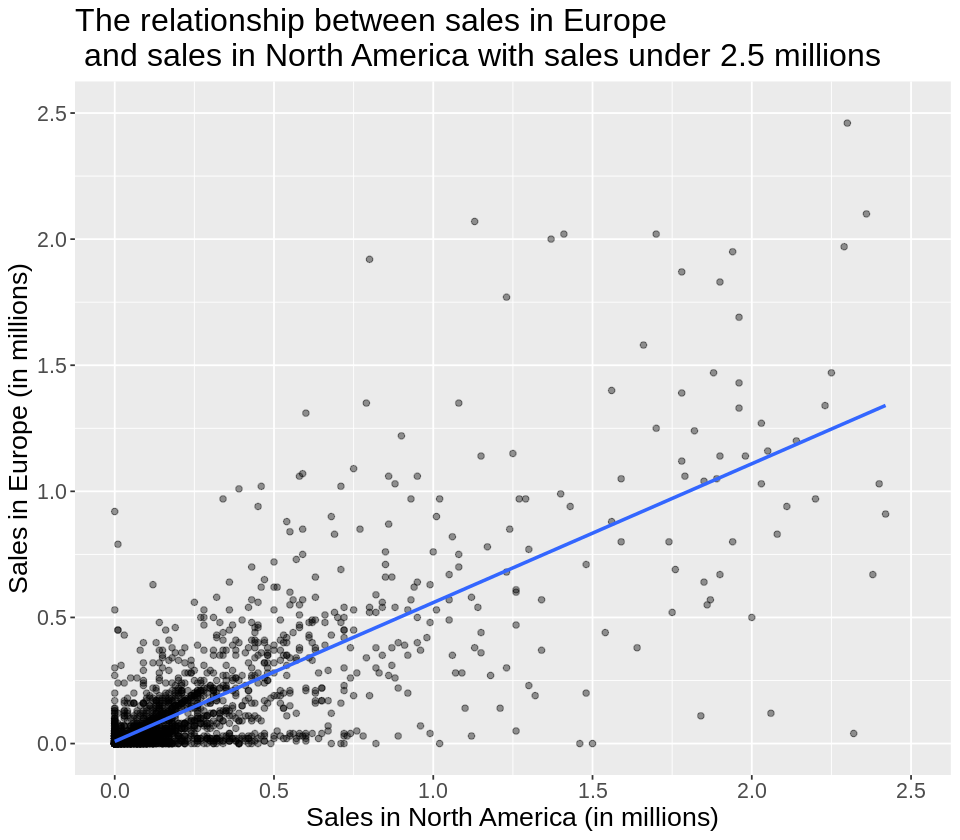

In [52]:
#simple linear regression model visualization
options(repr.plot.width = 8, repr.plot.height = 7)

lm_predictions <- vg_train%>%
    ggplot(aes(x = NA_Sales, y = EU_Sales))+
    geom_point(alpha=0.4)+
    labs(x = "Sales in North America (in millions)",
        y= "Sales in Europe (in millions)")+
    ggtitle("The relationship between sales in Europe \n and sales in North America with sales under 2.5 millions")+
    theme(text = element_text(size = 16))+
    geom_smooth(method = "lm", se = FALSE) +
    xlim(c(0, 2.5))+
    ylim(c(0, 2.5))
lm_predictions

<span style="color:gray">Figure 4. The relationship between sales in Europe and sales in North America with sales under 5 millions</span>

The sale distribution for different regions is then rendered in support of the skewed distribution. In *Figure 5*, the distributions for both dataframes are right skewed, indicating by the asymmetrical histograms. This skewness is expected as the sale values can vary depending on many factors: the popularity of the game, the perception of the customers. The more popular the game, the greater the sale value we will expect. The whole dataset consists of 16600 observations, ranking from the highest sales to the lowest. Therefore, the skewed distribution is due to the majority of the games having a small sale value.

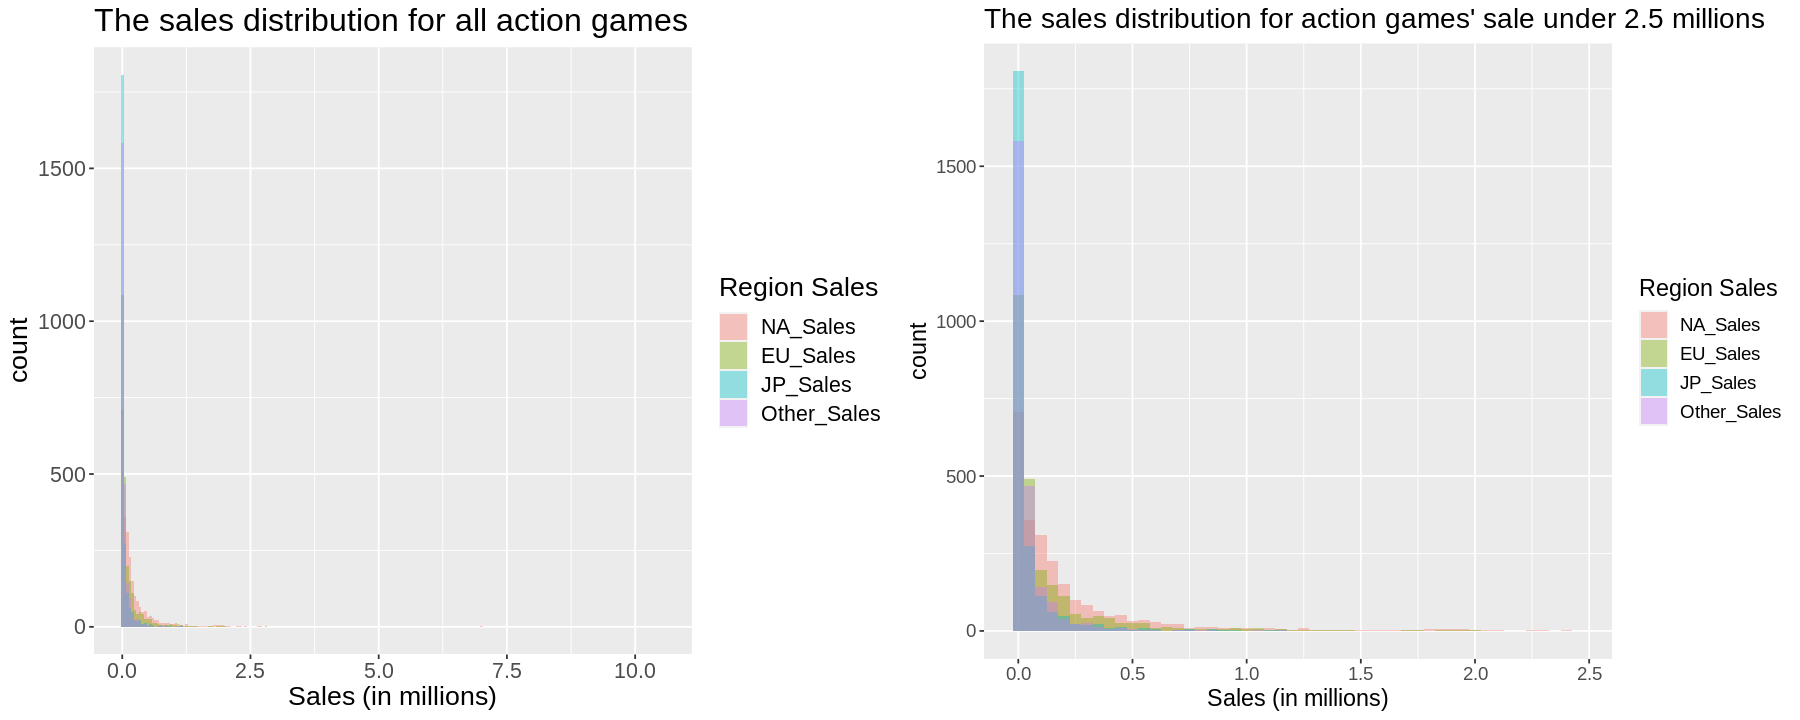

In [54]:
#visualization on sales distribution, color separation with different regions

vg_train_longer <- vg_train %>%
    pivot_longer(cols = NA_Sales:Other_Sales,
                  names_to = "region",
                  values_to = "sales") %>%
    mutate(region = as_factor(region)) 

#filter sales less than 2.5 millions
vg_train_2dot5m <- vg_train_longer %>%
    filter(sales <=2.5)


#sales distribution for sales under 2.5 millions
options(repr.plot.width = 15, repr.plot.height = 10)
vg_pop_dist_plot_2dot5m <- vg_train_2dot5m%>%
    ggplot(aes(x = sales, fill = as_factor(region)))+
    geom_histogram(position = "identity", binwidth=0.05, alpha = 0.4)+
    scale_color_brewer(palette = "Set1")+
    labs(x = "Sales (in millions)", fill = "Region Sales")+
    ggtitle("The sales distribution for action games' sale under 2.5 millions")+
    theme(text = element_text(size = 14))

#sales distribution for all sales
options(repr.plot.width = 10, repr.plot.height = 10)
vg_pop_dist_plot_all <- vg_train_longer%>%
    ggplot(aes(x = sales, fill = as_factor(region)))+
    geom_histogram(position = "identity", binwidth=0.05, alpha = 0.4)+
    scale_color_brewer(palette = "Set1")+
    labs(x = "Sales (in millions)",fill = "Region Sales")+
    ggtitle("The sales distribution for all action games")+
    theme(text = element_text(size = 16))


#compare the sale distribution with all action games vs action games under 2.5 million sales 
options(repr.plot.width = 15, repr.plot.height = 6)
plot_grid(vg_pop_dist_plot_all, vg_pop_dist_plot_2dot5m)
#sales data is right skewed, not sure how it will affect the linear regression

<span style="color:gray">Figure 5. The sales distribution comparison between all action games and action games with sales under 2.5 millions</span>

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 10 rows containing missing values (geom_bar).”


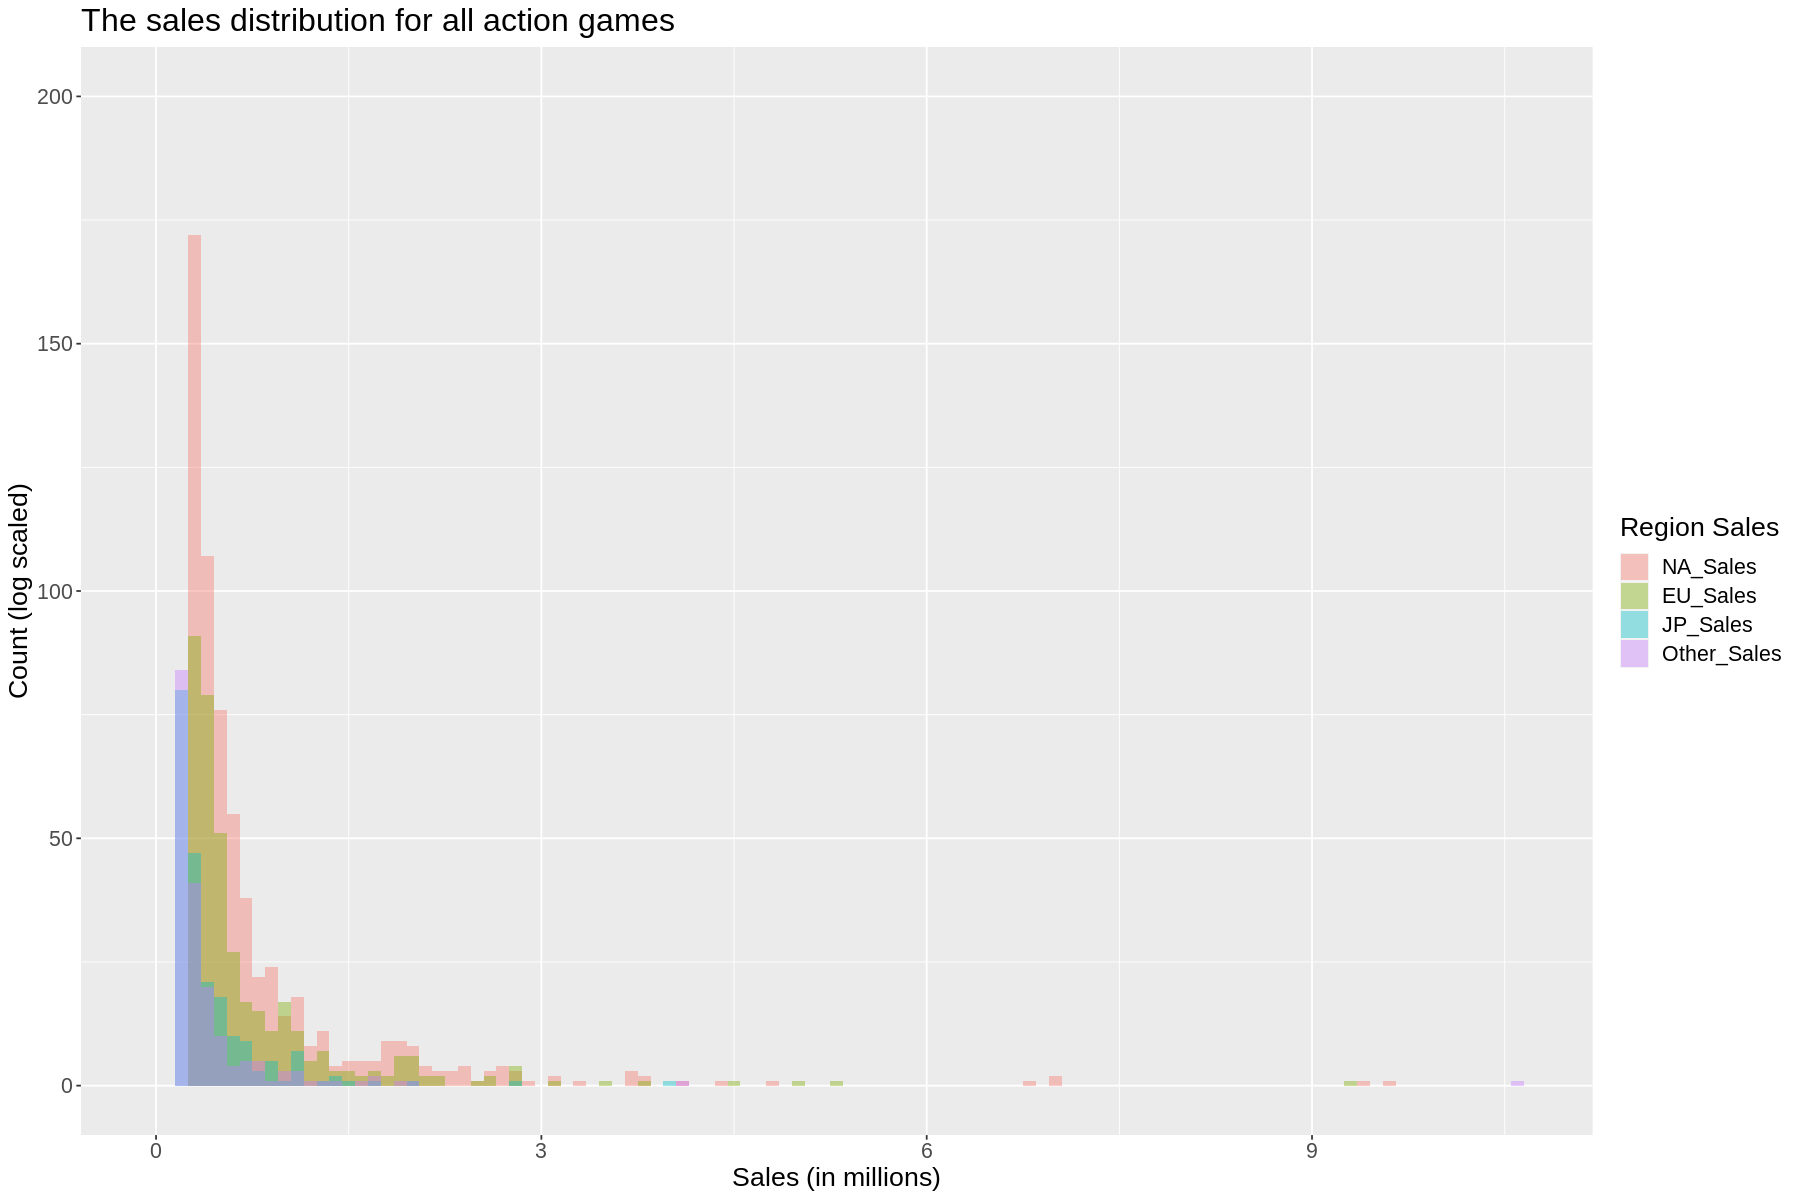

In [55]:
#visualization on sales distribution, color separation with different regions, put "sales" in log
#!!!set the log to the count (y-axis) instead of x log scale

#non-finite values are caused by log scale of values being 0, or very close to 0
options(repr.plot.width = 15, repr.plot.height = 10)
vg_pop_dist_plot_log <- vg_train_longer%>%
    ggplot(aes(x = sales, fill = as_factor(region)))+
    geom_histogram(position = "identity", binwidth=0.1, alpha = 0.4)+
    scale_color_brewer(palette = "Set1")+
    scale_y_continuous(trans = "log")+
    ylim(0,200)+
    labs(x = "Sales (in millions)",y= "Count (log scaled)",fill = "Region Sales")+
    ggtitle("The sales distribution for all action games")+
    theme(text = element_text(size = 16))


vg_pop_dist_plot_log

<span style="color:gray">Figure 6. The sales distribution of all action games</span>

In [56]:
#predict on the test data set to assess how well our model does
lm_test_results_onepredictor <- lm_fit %>%
  predict(vg_test) %>%
  bind_cols(vg_test) %>%
  metrics(truth = EU_Sales, estimate = .pred)

!!!Junqi: please comment on what we did here, eg. which column we used for truth etc.

#### 2.3.2 Case2: 2 predictors - NA_Sales and Other_Sales

!!!Junqi: please write in english what we did here, very similar to what you wrote previously for the one predictor

In [57]:
#CASE2->two predictors: NA_Sales and Other_Sales
lm_recipe_2 <- recipe(EU_Sales ~ NA_Sales + Other_Sales, data = vg_train)

#fit linear regression model
lm_fit_2 <- workflow() %>%
  add_recipe(lm_recipe_2) %>%
  add_model(lm_spec) %>%
  fit(data = vg_train)
lm_fit_2

#predict on the test data set to assess how well our model does
lm_test_results_twopredictors <- lm_fit_2 %>%
  predict(vg_test) %>%
  bind_cols(vg_test) %>%
  metrics(truth = EU_Sales, estimate = .pred)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)     NA_Sales  Other_Sales  
   0.010919     0.559789    -0.000132  


In order to compare the two linear regression models with different selections on the predictors, we calculate the RMSE. According to *Table 3*, the RMSE for `NA_Sales` only as the predictor (0.32) is higher compared to both `NA_Sales` and `Other_Sales` as predictors (0.26). Therefore, we can conclude that selecting `NA_Sales` and `Other_Sales` as predictors improve the accuracy of our model based on its smaller RMSE. 

In [58]:
lm_test_results_onepredictor 
lm_test_results_twopredictors

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.21792790
rsq,standard,0.71619129
mae,standard,0.09096033


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.21793568
rsq,standard,0.71616362
mae,standard,0.09096246


<span style="color:gray">Table . Comparative RMSE results for case 1 and 2.
Comparing RMSE !!! COMBINE THE 2 TABLES

!!!Junqi :please combine the two results into one table. 

### 2.4 K-Nearest Neighbour (KNN)

## 3. Discussion

**Summarize what you found** 
<br>

**Whether this is what you expected to find?**
<br>Our goal for this project is to predict the sales in Europe for a new action or sports game using sales in North America and other regional sales. With this regression model, we expect to accurately predict the sale values in the test set.

**What impact could such findings have?**
<br>Using our prediction model, it might be useful for video game publishers to predict the sales of new video games in new markets. This could help gaming companies to focus their advertisements in one specific region, ultimately maximizing their revenues. 

**What future questions could this lead to?**
<br>There are other factors we can investigate, for example, gaming influencers can impact audience's purchasing decisions. One strategy a gaming company can adapt is to collaborate with the influencers, thus, increasing profits.

## 4. References